<a href="https://colab.research.google.com/github/ateyodin/Hw2/blob/master/Hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [0]:
# Download the data and store it
# Apple Stock 
!wget -O Apple.csv https://www.dropbox.com/s/2zy6dp2sersn4bq/AAPL.csv?dl=0

--2019-09-07 01:55:42--  https://www.dropbox.com/s/2zy6dp2sersn4bq/AAPL.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.9.1, 2620:100:601f:1::a27d:901
Connecting to www.dropbox.com (www.dropbox.com)|162.125.9.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/2zy6dp2sersn4bq/AAPL.csv [following]
--2019-09-07 01:55:43--  https://www.dropbox.com/s/raw/2zy6dp2sersn4bq/AAPL.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc91a46eaa89610c87298da7c209.dl.dropboxusercontent.com/cd/0/inline/AoH2QbviXtdGPk53Iuh59-TG2rC95fJEDJ-LqMIJDjWpD3H93Ayd_PQ9Q7bdRHZa2EDKnwMzBPsUX85W6HgFsJLi-koK6mIqqgZ7pllg4jxLidCp-SXu5KVGJd-d4_DrTQ0/file# [following]
--2019-09-07 01:55:43--  https://uc91a46eaa89610c87298da7c209.dl.dropboxusercontent.com/cd/0/inline/AoH2QbviXtdGPk53Iuh59-TG2rC95fJEDJ-LqMIJDjWpD3H93Ayd_PQ9Q7bdRHZa2EDKnwMzBPsUX85W6HgFsJLi-koK6mIqqgZ7pllg4jxLidCp-SXu5KVGJ

In [0]:
df = pd.read_csv('Apple.csv')

In [0]:
df['Date'] = pd.to_datetime(df.Date, format='%Y-%m-%d') 
df = df.set_index('Date')


In [0]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-09-04,228.410004,229.179993,226.630005,228.360001,224.870499,27390100
2018-09-05,228.990005,229.669998,225.100006,226.869995,223.403275,33333000
2018-09-06,226.229996,227.350006,221.300003,223.100006,219.690903,34290000
2018-09-07,221.850006,225.369995,220.710007,221.300003,217.918411,37619800
2018-09-10,220.949997,221.850006,216.470001,218.330002,214.993759,39516500


In [0]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-08-26,205.860001,207.190002,205.059998,206.490005,206.490005,26043600
2019-08-27,207.860001,208.550003,203.529999,204.160004,204.160004,25873300
2019-08-28,204.100006,205.720001,203.320007,205.529999,205.529999,15938800
2019-08-29,208.500000,209.320007,206.660004,209.009995,209.009995,20990500
2019-08-30,210.160004,210.449997,207.199997,208.740005,208.740005,21143400


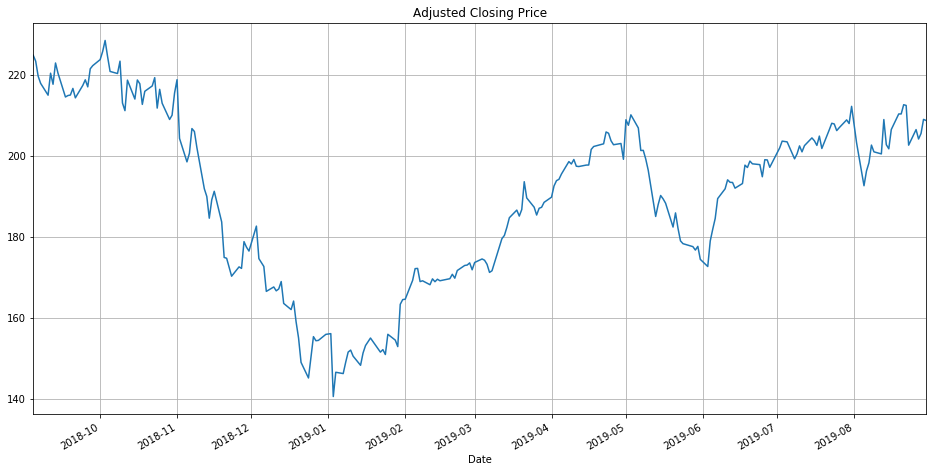

In [0]:
df['Adj Close'].plot(label='Apple', figsize=(16,8), title='Adjusted Closing Price', grid=True)

In [0]:
forecast_out = 30 
df['Prediction'] = df['Adj Close'].shift(-forecast_out)

In [0]:
x = np.array(df.drop(['Prediction'], 1))
x = x[:-forecast_out]

In [0]:
y = np.array(df['Prediction'])
y = y[:-forecast_out]

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [0]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
ridge_model = Ridge()
ridge_model.fit(x_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [0]:
lasso_model = Lasso()
lasso_model.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6423.624989276037, tolerance: 5.443550907553664
  positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [0]:
linear_model_score = linear_model.score(x_test, y_test)
print('LinearModel score:', linear_model_score)

LinearModel score: 0.3508663394058949


In [0]:
ridge_model_score = ridge_model.score(x_test, y_test)
print('RidgeModel score:', ridge_model_score)

RidgeModel score: 0.3527883971074204


In [0]:
lasso_model_score = lasso_model.score(x_test, y_test)
print('LassoModel score:', lasso_model_score)

LassoModel score: 0.3056234616109088


In [0]:
x_forecast = np.array(df.drop(['Prediction'], 1))[-forecast_out:]

In [0]:
linear_model_forecast_prediction = linear_model.predict(x_forecast)
linear_model_real_prediction = linear_model.predict(np.array(df.drop(['Prediction'], 1)))

In [0]:
ridge_model_forecast_prediction = ridge_model.predict(x_forecast)
ridge_model_real_prediction = ridge_model.predict(np.array(df.drop(['Prediction'], 1)))

In [0]:
lasso_model_forecast_prediction = lasso_model.predict(x_forecast)
lasso_model_real_prediction = lasso_model.predict(np.array(df.drop(['Prediction'], 1)))

In [0]:
predicted_dates = []
recent_date = df.index.max()
display_at = 2100
alpha = 0.5

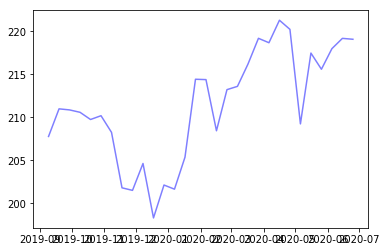

In [0]:
for i in range(forecast_out):
    recent_date += timedelta(days=10)
    predicted_dates.append(recent_date)
    
    plt.plot(df.index[display_at:], linear_model_real_prediction[display_at:], label='Linear Preds', c='blue', alpha=alpha)
plt.plot(predicted_dates, linear_model_forecast_prediction, c='blue', alpha=alpha)

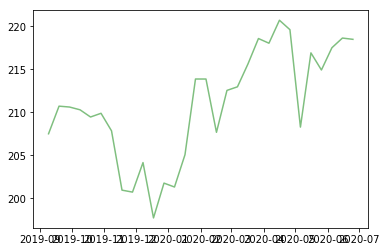

In [0]:
plt.plot(df.index[display_at:], ridge_model_real_prediction[display_at:], label='Ridge Preds', c='green', alpha=alpha)
plt.plot(predicted_dates, ridge_model_forecast_prediction, c='green', alpha=alpha)

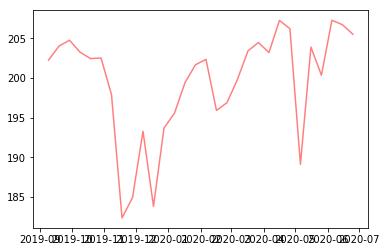

In [0]:
plt.plot(df.index[display_at:], lasso_model_real_prediction[display_at:], label='Lasso Preds', c='red', alpha=alpha)
plt.plot(predicted_dates, lasso_model_forecast_prediction, c='red', alpha=alpha)

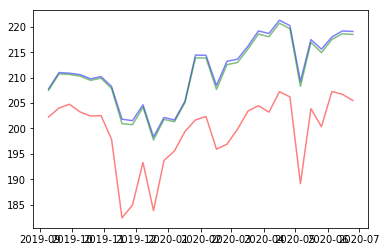

In [0]:
plt.plot(df.index[display_at:], linear_model_real_prediction[display_at:], label='Linear Preds', c='blue', alpha=alpha)
plt.plot(predicted_dates, linear_model_forecast_prediction, c='blue', alpha=alpha)
plt.plot(df.index[display_at:], ridge_model_real_prediction[display_at:], label='Ridge Preds', c='green', alpha=alpha)
plt.plot(predicted_dates, ridge_model_forecast_prediction, c='green', alpha=alpha)
plt.plot(df.index[display_at:], lasso_model_real_prediction[display_at:], label='Lasso Preds', c='red', alpha=alpha)
plt.plot(predicted_dates, lasso_model_forecast_prediction, c='red', alpha=alpha)